In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
defaulter_df = pd.read_csv("./data/Default.csv") 
defaulter_df.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [4]:
print("Size of the data : ", defaulter_df.shape)

Size of the data :  (10000, 4)


In [5]:
print("Target variable frequency distribution : \n", defaulter_df["default"].value_counts())

Target variable frequency distribution : 
 No     9667
Yes     333
Name: default, dtype: int64


In [6]:
X = defaulter_df[["balance", "income"]]
y = defaulter_df["default"]

#### Train-test Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [9]:
print("Size of training data :", X_train.shape[0])
print("Size of test data : ", X_test.shape[0])


Size of training data : 8000
Size of test data :  2000


#### Normalization

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
min_max = MinMaxScaler()
min_max.fit(X_train)  
train_transformed = min_max.transform(X_train)
transformed = min_max.transform(X_test)
transformed

array([[0.54087734, 0.42228861],
       [0.29076698, 0.56836789],
       [0.        , 0.28904364],
       ...,
       [0.01028582, 0.33358208],
       [0.50821105, 0.27614282],
       [0.11254081, 0.67068403]])

In [12]:
#training dataset
X_train["balance_normalized"] = train_transformed[:,0]
X_train["income_normalized"] = train_transformed[:,1]
X_train.head()

,balance,income,balance_normalized,income_normalized
9254,1018.568130,34103.87952,0.383739,0.457967
1561,62.170050,28660.74751,0.023422,0.383181
1670,1046.743543,40822.44741,0.394354,0.550278
6087,763.735280,44125.71873,0.287733,0.595664
6669,697.248633,25730.91758,0.262684,0.342926


In [13]:
X_test["balance_normalized"] = transformed[:,0]
X_test["income_normalized"] = transformed[:,1]
X_test.head()

,balance,income,balance_normalized,income_normalized
6252,1435.662933,31507.08928,0.540877,0.422289
4684,771.789347,42139.07027,0.290767,0.568368
1731,0.000000,21809.21851,0.000000,0.289044
4742,113.571264,32803.83265,0.042787,0.440105
4521,1358.132472,49903.59708,0.511668,0.675049


### Fitting kNN

#### 1. k = 3

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors = 3, metric = "euclidean")
knn.fit(X_train[["balance_normalized","income_normalized"]], y_train)
# OR
#knn.fit(train_transformed, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [16]:
predictions = knn.predict(X_test[["balance_normalized","income_normalized"]])
#OR
#predictions = knn.predict(transformed)
predictions

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [17]:
y_test

6252    No
4684    No
1731    No
4742    No
4521    No
        ..
6412    No
8285    No
7853    No
1095    No
6929    No
Name: default, Length: 2000, dtype: object

#### computing accuracy

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
test_accuracy = accuracy_score(y_test, predictions)
print("Accuracy on test data :", test_accuracy)

Accuracy on test data : 0.9625


In [20]:
train_predictions = knn.predict(X_train[["balance_normalized","income_normalized"]])
train_accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy on training data :", train_accuracy)

Accuracy on training data : 0.978625


In [21]:
knn_5 = KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn_5.fit(X_train[["balance_normalized","income_normalized"]], y_train)

KNeighborsClassifier(metric='euclidean')

#### 2. k = 5

In [22]:
knn_5 = KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn_5.fit(X_train[["balance_normalized","income_normalized"]], y_train)

predictions = knn_5.predict(X_test[["balance_normalized","income_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
print("Accuracy on test data :", test_accuracy)

train_predictions = knn_5.predict(X_train[["balance_normalized","income_normalized"]])
train_accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy on training data :", train_accuracy)

Accuracy on test data : 0.964
Accuracy on training data : 0.9755


### Finding Optimal value of k 

In [23]:
train_accuracies = []
test_accuracies = []
for i in range(1,16,2):
    knn = KNeighborsClassifier(n_neighbors = i, metric = "euclidean")
    knn.fit(X_train[["balance_normalized","income_normalized"]], y_train)
    
    predictions = knn.predict(X_test[["balance_normalized","income_normalized"]])
    train_predictions = knn.predict(X_train[["balance_normalized","income_normalized"]])
    
    test_accuracy = accuracy_score(y_test, predictions)
    test_accuracies.append(test_accuracy)
    
    train_accuracy = accuracy_score(y_train, train_predictions)
    train_accuracies.append(train_accuracy)

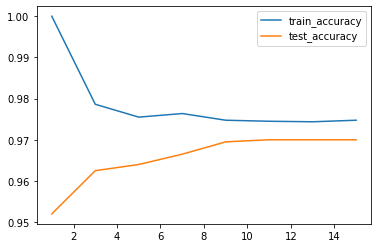

In [24]:
k_values = list(range(1,16,2))
plt.plot(k_values, train_accuracies)
plt.plot(k_values, test_accuracies)
plt.legend(["train_accuracy", "test_accuracy"])

#### Fitting with initial optimal value of k

In [25]:
knn = KNeighborsClassifier(n_neighbors = 9, metric = "euclidean")
knn.fit(X_train[["balance_normalized","income_normalized"]], y_train)

predictions = knn.predict(X_test[["balance_normalized","income_normalized"]])
#train_predictions = knn.predict(X_train)
test_accuracy = accuracy_score(y_test, predictions)
print("Accuracy on test data :", test_accuracy)
train_predictions = knn.predict(X_train[["balance_normalized","income_normalized"]])
train_accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy on training data :", train_accuracy)

Accuracy on test data : 0.9695
Accuracy on training data : 0.97475


#### Validation Split

#### 1. Simple train and validation split

In [26]:
x_train, x_val, y_train_new, y_val = train_test_split(X_train[["balance_normalized","income_normalized"]],y_train, test_size = 0.2, random_state = 42)

In [27]:
print("Size of training data: ", x_train.shape[0])
print("Size of validation data : ", x_val.shape[0])

Size of training data:  6400
Size of validation data :  1600


In [28]:
train_accuracies = []
val_accuracies = []
for i in range(1,16,2):
    knn = KNeighborsClassifier(n_neighbors = i, metric = "euclidean")
    knn.fit(x_train, y_train_new)
    
    val_predictions = knn.predict(x_val)
    val_accuracy = accuracy_score(y_val, val_predictions)
    val_accuracies.append(val_accuracy)
    
    train_predictions = knn.predict(x_train)
    
    train_accuracy = accuracy_score(y_train_new, train_predictions)
    train_accuracies.append(train_accuracy)

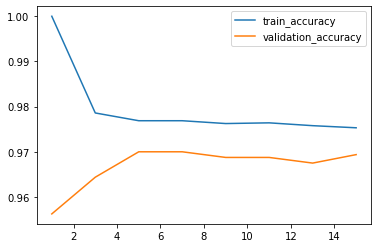

In [29]:
k_values = list(range(1,16,2))
plt.plot(k_values, train_accuracies)
plt.plot(k_values, val_accuracies)
plt.legend(["train_accuracy", "validation_accuracy"])

In [30]:
#fitting with optimla value of k
knn = KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(x_train, y_train_new)
val_predictions = knn.predict(x_val)
val_accuracy = accuracy_score(y_val, val_predictions)
val_accuracy

0.97

In [31]:
predictions = knn.predict(X_test[["balance_normalized","income_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.963

#### 2. Cross Validation

In [32]:
from sklearn.model_selection import cross_validate

In [33]:
cv_results = cross_validate(knn, X_train[["balance_normalized","income_normalized"]], y_train, cv=4, return_train_score =True)
cv_results

{'fit_time': array([0.01000071, 0.00974274, 0.00749731, 0.00930476]),
 'score_time': array([0.076648  , 0.08101797, 0.07275653, 0.04804349]),
 'test_score': array([0.973, 0.972, 0.967, 0.971]),
 'train_score': array([0.9755    , 0.97633333, 0.97683333, 0.97616667])}

In [34]:
print("Training data average accuracy :", cv_results["train_score"].mean()*100)
print("Validation data average accuracy :", cv_results["test_score"].mean()*100)

Training data average accuracy : 97.62083333333334
Validation data average accuracy : 97.075


In [35]:
knn.fit(X_train[["balance_normalized","income_normalized"]], y_train)
predictions = knn.predict(X_test[["balance_normalized","income_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.964

### Hyper-parameter tuning using GridSearch

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
knn = KNeighborsClassifier(metric = "euclidean")

In [38]:
param_grid  = {"n_neighbors" : np.arange(1,16,2)}

In [39]:
knn_with_gs = GridSearchCV(knn, param_grid, return_train_score = True, verbose =1, scoring = "accuracy")

In [40]:
knn_with_gs.fit(X_train[["balance_normalized","income_normalized"]], y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=KNeighborsClassifier(metric='euclidean'),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15])},
             return_train_score=True, scoring='accuracy', verbose=1)

In [41]:
knn_with_gs.cv_results_

{'mean_fit_time': array([0.00891213, 0.00782733, 0.00537291, 0.00706944, 0.00673113,
        0.00524921, 0.00787349, 0.00738411]),
 'std_fit_time': array([0.00171368, 0.00101748, 0.00302946, 0.00109873, 0.00082998,
        0.00266524, 0.00085216, 0.00183764]),
 'mean_score_time': array([0.04393244, 0.03714185, 0.03743982, 0.03817854, 0.0381566 ,
        0.03810005, 0.03912821, 0.04105   ]),
 'std_score_time': array([0.0057482 , 0.00329318, 0.00409156, 0.00370518, 0.00357303,
        0.0040353 , 0.00304989, 0.00169549]),
 'param_n_neighbors': masked_array(data=[1, 3, 5, 7, 9, 11, 13, 15],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 9},
  {'n_neighbors': 11},
  {'n_neighbors': 13},
  {'n_neighbors': 15}],
 'split0_test_score': array([0.95875 , 0.970625, 0.974375, 0.975   , 0.97625 , 0.97562

In [42]:
tuned_df = pd.DataFrame(knn_with_gs.cv_results_)
tuned_df = tuned_df[["param_n_neighbors","mean_train_score", "mean_test_score"]]
tuned_df

,param_n_neighbors,mean_train_score,mean_test_score
0,1,1.000000,0.955375
1,3,0.978437,0.966750
2,5,0.975938,0.969875
3,7,0.975969,0.970875
4,9,0.975125,0.973250
5,11,0.974781,0.973500
6,13,0.975000,0.973125
7,15,0.974719,0.972625


In [43]:
knn_9 =  KNeighborsClassifier(n_neighbors = 11, metric = "euclidean")
knn_9.fit(X_train[["balance_normalized","income_normalized"]], y_train)
predictions = knn_9.predict(X_test[["balance_normalized","income_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.97

### Evaluation measures

#### Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix   #correct and incorrect classification for all class 

In [45]:
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[1921   10]
 [  50   19]]


In [46]:
pd.DataFrame(cm, columns = ["No", "Yes"], index = ["No", "Yes"])

,No,Yes
No,1921,10
Yes,50,19


#### Precision and Recall

In [47]:
from sklearn.metrics import precision_score, recall_score

In [48]:
precision_score(y_test,predictions, pos_label = "Yes")

0.6551724137931034

In [49]:
precision_score(y_test,predictions, pos_label = "No")

0.9746321664129883

In [50]:
recall_score(y_test,predictions, pos_label = "Yes")

0.2753623188405797

In [51]:
recall_score(y_test,predictions, pos_label = "No")

0.9948213360952874

#### F1-score

In [52]:
from sklearn.metrics import f1_score

In [53]:
f1_score(y_test,predictions,pos_label = "No")

0.9846232701178882

In [54]:
f1_score(y_test,predictions,pos_label = "Yes")

0.38775510204081637

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.97      0.99      0.98      1931
         Yes       0.66      0.28      0.39        69

    accuracy                           0.97      2000
   macro avg       0.81      0.64      0.69      2000
weighted avg       0.96      0.97      0.96      2000



In [56]:
#decision tree

In [57]:
import seaborn as sns

In [58]:
y

0       No
1       No
2       No
3       No
4       No
        ..
9995    No
9996    No
9997    No
9998    No
9999    No
Name: default, Length: 10000, dtype: object

In [59]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [60]:
print(defaulter_df.shape)

(10000, 4)


In [61]:
from sklearn.tree import DecisionTreeClassifier
decision=DecisionTreeClassifier(random_state=0)
decision.fit(X,y)

DecisionTreeClassifier(random_state=0)

In [62]:
prediction=decision.predict(X)
prediction

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
print("decision tree accuracy is",accuracy_score(y,prediction))

decision tree accuracy is 1.0


In [65]:
from sklearn.tree import export_graphviz
import graphviz

In [66]:
import os
os.environ["PATH"]+=os.pathsep + 'C:/Program Files/Graphviz/bin/'

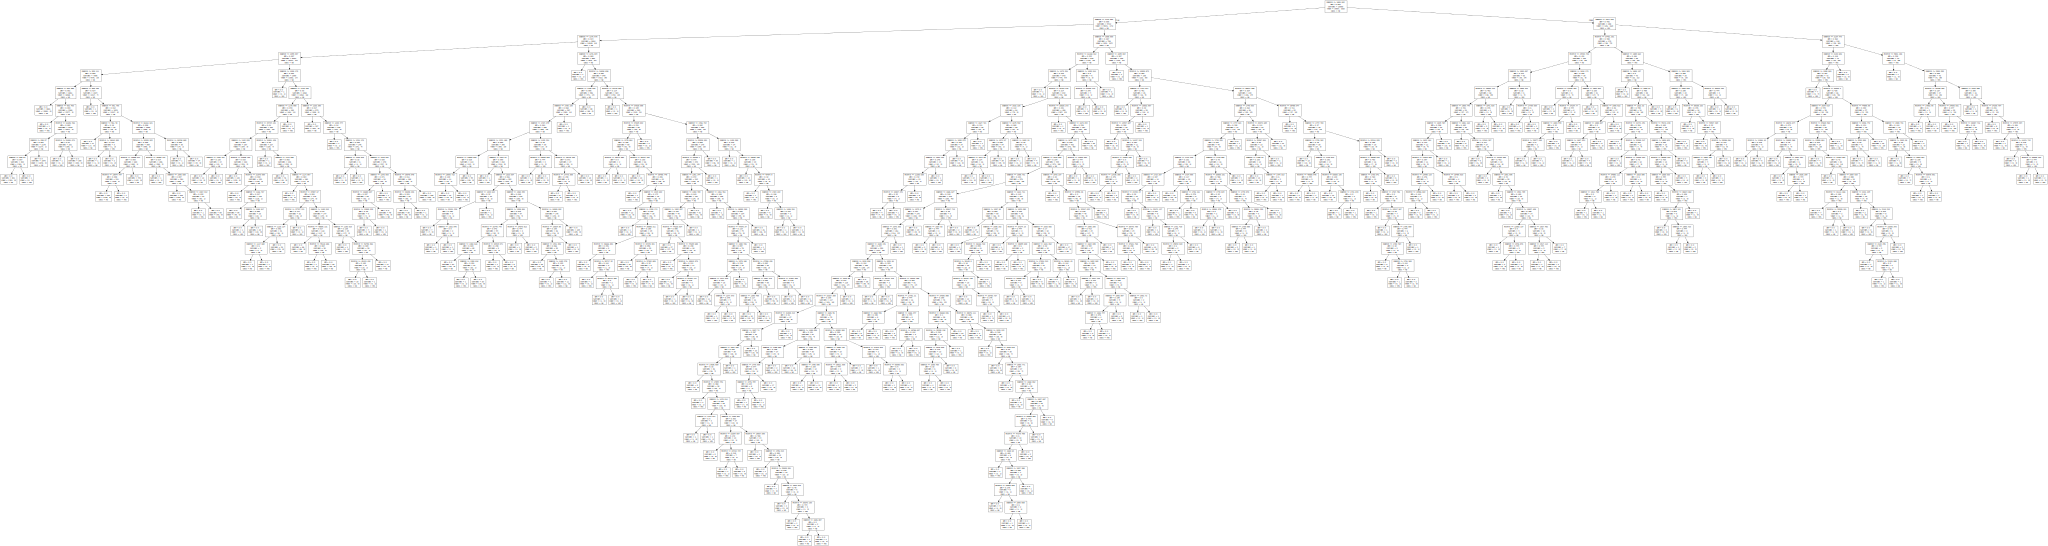

In [67]:
viz_data = export_graphviz(decision,feature_names = X.columns, class_names = decision.classes_)
tree=graphviz.Source(viz_data)
tree